## Current Output PLL Filter Circuit
![Circuit](.\Circuit.png)

R1=593660415.103119Ω,C1=0.000226nF,R2=1000.000000Ω,C2=2.677514nF,C3=0.000023nF
ft=3759.398496Hz,f_3dB=5000.000000Hz


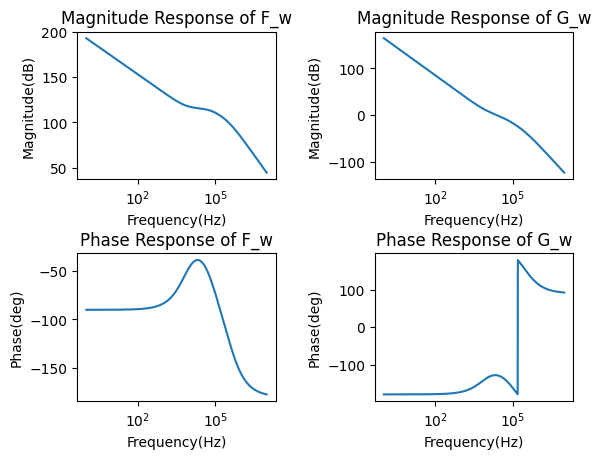

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi, sqrt
%matplotlib inline

f_pfd = 100e3  # pfd 频率
w_pfd = 2 * pi * f_pfd
w_3dB = w_pfd * 0.05  # 推荐值
N = 100  # 分频数
K_0 = 10  # VCO的增益 Hz/V
K_d = 5 / (4 * pi)  # PFD的增益 V/Hz
i_out=5e-3
u_max=5.0
R2=1e3

Rb=u_max/i_out

w_t = w_3dB / 1.33
w2 = w_t / sqrt(10)
w3=w_t*sqrt(10)
w4=5*w3

t1=K_0*K_d/(N*w2**2*sqrt(10))
t2=1/w2
t3=1/w3
t4=1/w4

C1=t1/Rb
R1=t2/C1
C3=t3/R1
C2=t4/R2

print("R1=%fΩ,C1=%fnF,R2=%fΩ,C2=%fnF,C3=%fnF" % (R1, C1 * 1e9, R2, C2 * 1e9, C3 * 1e9))
print(
    "ft=%fHz,f_3dB=%fHz"
    % (w_t / 2 / pi, w_3dB / 2 / pi)
)


w_list = np.logspace(np.log10(1), np.log10(10e6), 1000)
F_w = (
    (1 + 1j * w_list * t2)
    / (1j * w_list*t1*(1 + 1j * w_list * t3) * (1 + 1j * w_list * t4))
)
F_w_abs = np.abs(F_w)
F_w_log = 20 * np.log10(F_w_abs)
F_w_angle = np.angle(F_w) * 180 / pi
plt.subplot(2, 2, 1)
plt.plot(w_list, F_w_log)
plt.xscale("log")
plt.xlabel("Frequency(Hz)")
plt.ylabel("Magnitude(dB)")
plt.title("Magnitude Response of F_w")
plt.subplot(2, 2, 3)
plt.plot(w_list, F_w_angle)
plt.xscale("log")
plt.xlabel("Frequency(Hz)")
plt.ylabel("Phase(deg)")
plt.title("Phase Response of F_w")

G_w = (
    K_0
    * K_d
    / N
    * (1 + 1j * w_list * t2)
    / (1j * w_list*1j * w_list*t1*(1 + 1j * w_list * t3) * (1 + 1j * w_list * t4))
)

G_w_abs = np.abs(G_w)
G_w_log = 20 * np.log10(G_w_abs)
G_w_angle = np.angle(G_w) * 180 / pi
plt.subplot(2, 2, 2)
plt.plot(w_list, G_w_log)
plt.xscale("log")
plt.xlabel("Frequency(Hz)")
plt.ylabel("Magnitude(dB)")
plt.title("Magnitude Response of G_w")
plt.subplot(2, 2, 4)

plt.plot(w_list, G_w_angle)
plt.xscale("log")
plt.xlabel("Frequency(Hz)")
plt.ylabel("Phase(deg)")
plt.title("Phase Response of G_w")
plt.subplots_adjust(
    left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.5
)
plt.show()